**Research Question:**
How have increasing energy prices impacted the unemployment rate across different economic sectors in Great Britain?

Unemployment is a key economic indicator that can quickly show the effects of increasing energy prices. Sectors heavily dependent on energy may cut jobs to offset these costs. Understanding the link between energy prices and unemployment can offer valuable insights for policymakers, businesses, and the general public.

**Workflow**

- Data Collection: Gather data on energy prices and unemployment rates across different sectors in Great Britain.
- Data Preprocessing: Prepare the data for analysis, including feature engineering.
- Exploratory Data Analysis: Basic statistics and visualizations.
- Machine Learning Model: A simple predictive model to forecast unemployment in sectors based on energy prices. Measure model performance.
- Interactive Dashboard: Create a Plotly Dash dashboard with interactive charts to visualise the relationship between energy prices and unemployment.
- Report Writing: The report will summarize the above steps and include screenshots from the dashboard.

**Report Outline**

1. Introduction
2. Methodology
3. Findings from EDA and ML Model
4. Interactive Dashboard Highlights
5. Conclusion and Recommendations

**Step 1: Data Collection**

For this analysis, we need:

- **Energy Prices Over Time**: 
    Source: https://www.gov.uk/government/statistical-data-sets/gas-and-electricity-prices-in-the-non-domestic-sector
    Quarterly prices of electricity, gas since 2004 broken down by size of consumer (Very Small, Small, Small/Med, Med, Large, Very Large, Extra Large)
- **Unemployment Rates by Sector**: 
    Source: https://www.ons.gov.uk/employmentandlabourmarket/peoplenotinwork/unemployment/datasets/unemploymentbypreviousindustrialsectorunem03
    Monthly (3 month average) unemployment rates for different economic sectors in Great Britain.

In [51]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [52]:
# Get energy dataset

energy_prices_excel_path = "data/table_341.xlsx"
sheet_name_energy = "3.4.1 (excl CCL)"
os.chdir("d:/Users/ellie.brakoniecki/Desktop/ONS/Module_10_project/Energy-prices-project/")

energy_prices_df = pd.read_excel(energy_prices_excel_path, sheet_name=sheet_name_energy, skiprows=6)

energy_prices_df.head()

,Year,Quarter,Electricity: Very Small (Pence per kWh),Electricity: Small (Pence per kWh),Electricity: Small/Medium (Pence per kWh),Electricity: Medium (Pence per kWh),Electricity: Large (Pence per kWh),Electricity: Very Large (Pence per kWh),Electricity: Extra Large (Pence per kWh),Electricity: Average (Pence per kWh),Gas: Very Small (Pence per kWh),Gas: Small (Pence per kWh),Gas: Medium (Pence per kWh),Gas: Large (Pence per kWh),Gas: Very Large (Pence per kWh),Gas: Average (Pence per kWh)
0,2004,1st,5.835000,5.092000,3.754000,3.303000,3.141000,2.761000,NaN,3.724,1.488000,1.295000,1.078000,0.982000,0.844000,1.162000
1,2004,2nd,5.906000,4.912000,3.815000,3.304000,3.043000,2.653000,NaN,3.593,1.363000,1.221000,1.185000,0.987000,1.025000,1.151000
2,2004,3rd,6.065000,4.429000,3.593000,3.386000,3.392000,2.929000,NaN,3.663,1.598000,1.445000,1.144000,0.862000,0.953000,1.150000
3,2004,4th,6.136377,5.347285,4.506726,3.969653,3.934902,3.627430,NaN,4.456,1.370057,1.302883,1.249985,1.139692,0.992244,1.223952
4,2005,1st,6.294651,5.565824,4.914627,4.273887,4.097487,3.634637,NaN,4.572,1.708988,1.612430,1.494750,1.369941,1.242410,1.488000


In [53]:
# Get unemployment dataset
unemployment_rates_excel_path = "data/unem03aug2023.xls"
sheet_name_unemployment = "People_rates"

rows_to_skip = list(range(0, 5)) + [7, 8] + list(range(165, 180))
unemployment_rates_df = pd.read_excel(unemployment_rates_excel_path, 
                   sheet_name=sheet_name_unemployment, 
                   skiprows=rows_to_skip, 
                   header=[0, 1], 
                   index_col=0  
                  )

# keep only the first 15 columns as we don't need the "Proportion of long-term unemployed2 by industry of last job3 (Standard Industrial Classification SIC 2007) figures"												
unemployment_rates_df = unemployment_rates_df.iloc[:, :15]

unemployment_rates_df.head()

UNEM03 part 2: All and long-term unemployment rates by industry of last job: People (not seasonally adjusted),Overall unemployment rate,"Agriculture, forestry, fishing, mining, energy & water",Manufacturing,Construction,"Wholesale, retail & repair of motor vehicles",Transport & storage,Accommodation & food services,Information & communication,"Financial, insurance & real estate activities","Professional, scientific & technical activities",Administrative & support services,Public admin & defence; social security,Education,Human health & social work activities,Other services
Date of publication:,Unnamed: 1_level_1,"A, B, D, E",C,F,G,H,I,J,"K, L",M,N,O,P,Q,"R, S, T"
Jan-Mar 1995,8.950708,7.375231,8.859835,13.064911,7.983369,6.908154,11.146528,6.811928,4.014515,4.325239,11.097184,4.562461,3.413753,3.794349,7.850067
Apr-Jun 1995,8.595228,6.481964,7.964925,12.458801,7.424431,7.007257,9.962845,6.541835,4.032569,4.372211,11.033939,4.298158,3.639628,3.723424,6.498982
Jul-Sep 1995,8.884912,6.122548,7.979559,11.686721,7.589674,7.369748,9.459627,6.411622,4.262474,4.432430,10.113778,4.484188,4.579207,3.513187,6.842641
Oct-Dec 1995,8.123446,5.038842,7.645849,11.537070,6.737550,6.860964,10.023651,5.191765,4.269883,4.241876,10.265008,4.192404,3.313537,3.421118,7.259723
Jan-Mar 1996,8.300880,6.589230,8.017047,12.348847,6.811119,7.463956,11.251616,4.903386,3.970322,4.198555,10.899347,3.445773,3.400729,3.265368,7.554345


**Data cleaning/preprocessing**
- We will focus on the average prices for electricity and gas because it simplifies our analysis while still providing a meaningful   indicator of energy costs. 
Using averages removes the need to consider the different business sizes (very small, small, medium, large, etc.), which would complicate the analysis and require additional data to interpret accurately. As we don't have specific information on how businesses of various sizes contribute to different economic sector and we're limited on time we will use average prices.
- we will only use the unemp rate not the .. and we will take the avarage of the monthly figures after 2018 and only use data from 2004 to match the energy dataset

In [54]:
# Cleaning the energy dataset

necessary_columns = ["Year", "Quarter", "Electricity: Average (Pence per kWh)", "Gas: Average (Pence per kWh)"]
energy_prices_df = energy_prices_df[necessary_columns]

print(energy_prices_df.info())

energy_prices_df['Year'] = energy_prices_df['Year'].astype(str)
energy_prices_df['Quarter'] = energy_prices_df['Quarter'].astype(str)

energy_prices_df.reset_index()
# print(energy_prices_df.describe())
print(energy_prices_df.isnull().sum()) # check no missing values

energy_prices_df['Time_Period'] = energy_prices_df['Year'] + "_" + "Q" + energy_prices_df['Quarter'].str.extract('(\d+)')[0]

energy_prices_df.drop(['Year', 'Quarter'], axis=1, inplace=True)

energy_prices_df = energy_prices_df[['Time_Period', 'Electricity: Average (Pence per kWh)', 'Gas: Average (Pence per kWh)']]

energy_prices_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  77 non-null     int64  
 1   Quarter                               77 non-null     object 
 2   Electricity: Average (Pence per kWh)  77 non-null     float64
 3   Gas: Average (Pence per kWh)          77 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.5+ KB
None
Year                                    0
Quarter                                 0
Electricity: Average (Pence per kWh)    0
Gas: Average (Pence per kWh)            0
dtype: int64


,Time_Period,Electricity: Average (Pence per kWh),Gas: Average (Pence per kWh)
0,2004_Q1,3.724,1.162000
1,2004_Q2,3.593,1.151000
2,2004_Q3,3.663,1.150000
3,2004_Q4,4.456,1.223952
4,2005_Q1,4.572,1.488000


In [55]:
energy_prices_df.to_csv("cleaned_energy_prices_df.csv", index=False)

In [56]:
# Cleaning the unemployment dataset

# merge the two header rows
new_columns = []
for col in unemployment_rates_df.columns:
    if 'Unnamed' not in col[1]:
        new_columns.append(f"{col[0]} ({col[1]})")
    else:
        new_columns.append(col[0])
        
unemployment_rates_df.columns = new_columns

unemployment_rates_df.reset_index(inplace=True)
unemployment_rates_df.rename(columns={'index': 'Date Range'}, inplace=True)
unemployment_rates_df.head()

,Date Range,Overall unemployment rate,"Agriculture, forestry, fishing, mining, energy & water (A, B, D, E)",Manufacturing (C),Construction (F),"Wholesale, retail & repair of motor vehicles (G)",Transport & storage (H),Accommodation & food services (I),Information & communication (J),"Financial, insurance & real estate activities (K, L)","Professional, scientific & technical activities (M)",Administrative & support services (N),Public admin & defence; social security (O),Education (P),Human health & social work activities (Q),"Other services (R, S, T)"
0,Jan-Mar 1995,8.950708,7.375231,8.859835,13.064911,7.983369,6.908154,11.146528,6.811928,4.014515,4.325239,11.097184,4.562461,3.413753,3.794349,7.850067
1,Apr-Jun 1995,8.595228,6.481964,7.964925,12.458801,7.424431,7.007257,9.962845,6.541835,4.032569,4.372211,11.033939,4.298158,3.639628,3.723424,6.498982
2,Jul-Sep 1995,8.884912,6.122548,7.979559,11.686721,7.589674,7.369748,9.459627,6.411622,4.262474,4.432430,10.113778,4.484188,4.579207,3.513187,6.842641
3,Oct-Dec 1995,8.123446,5.038842,7.645849,11.537070,6.737550,6.860964,10.023651,5.191765,4.269883,4.241876,10.265008,4.192404,3.313537,3.421118,7.259723
4,Jan-Mar 1996,8.300880,6.589230,8.017047,12.348847,6.811119,7.463956,11.251616,4.903386,3.970322,4.198555,10.899347,3.445773,3.400729,3.265368,7.554345


In [57]:
# Convert the date range to a standardised quarterly format to match with energy df 

def standardise_quarter(date_range):
    months, year = date_range.split(" ")
    
    month_to_quarter_classic = {
        "Jan-Mar": "Q1",
        "Apr-Jun": "Q2",
        "Jul-Sep": "Q3",
        "Oct-Dec": "Q4",
    }
    
    month_to_quarter_rolling = {
        "Jan": "Q1",
        "Feb": "Q1",
        "Mar": "Q2",
        "Apr": "Q2",
        "May": "Q2",
        "Jun": "Q3",
        "Jul": "Q3",
        "Aug": "Q3",
        "Sep": "Q4",
        "Oct": "Q4",
        "Nov": "Q4",
        "Dec": "Q1",
    }
            
    if months in month_to_quarter_classic.keys():
        return f"{year}_{month_to_quarter_classic[months]}"
    
    else:
        first_month = months.split("-")[0]
        return f"{year}_{month_to_quarter_rolling[first_month]}"

# Apply the function to the DataFrame
unemployment_rates_df['Standardised_Quarter'] = unemployment_rates_df['Date Range'].apply(standardise_quarter)

In [58]:
unemployment_rates_df.head()

,Date Range,Overall unemployment rate,"Agriculture, forestry, fishing, mining, energy & water (A, B, D, E)",Manufacturing (C),Construction (F),"Wholesale, retail & repair of motor vehicles (G)",Transport & storage (H),Accommodation & food services (I),Information & communication (J),"Financial, insurance & real estate activities (K, L)","Professional, scientific & technical activities (M)",Administrative & support services (N),Public admin & defence; social security (O),Education (P),Human health & social work activities (Q),"Other services (R, S, T)",Standardised_Quarter
0,Jan-Mar 1995,8.950708,7.375231,8.859835,13.064911,7.983369,6.908154,11.146528,6.811928,4.014515,4.325239,11.097184,4.562461,3.413753,3.794349,7.850067,1995_Q1
1,Apr-Jun 1995,8.595228,6.481964,7.964925,12.458801,7.424431,7.007257,9.962845,6.541835,4.032569,4.372211,11.033939,4.298158,3.639628,3.723424,6.498982,1995_Q2
2,Jul-Sep 1995,8.884912,6.122548,7.979559,11.686721,7.589674,7.369748,9.459627,6.411622,4.262474,4.432430,10.113778,4.484188,4.579207,3.513187,6.842641,1995_Q3
3,Oct-Dec 1995,8.123446,5.038842,7.645849,11.537070,6.737550,6.860964,10.023651,5.191765,4.269883,4.241876,10.265008,4.192404,3.313537,3.421118,7.259723,1995_Q4
4,Jan-Mar 1996,8.300880,6.589230,8.017047,12.348847,6.811119,7.463956,11.251616,4.903386,3.970322,4.198555,10.899347,3.445773,3.400729,3.265368,7.554345,1996_Q1


In [59]:
print(unemployment_rates_df.isnull().sum()) # check for missing values

Date Range                                                             0
Overall unemployment rate                                              0
Agriculture, forestry, fishing, mining, energy & water (A, B, D, E)    0
Manufacturing (C)                                                      0
Construction (F)                                                       0
Wholesale, retail & repair of motor vehicles (G)                       0
Transport & storage (H)                                                0
Accommodation & food services (I)                                      0
Information & communication (J)                                        0
Financial,  insurance & real estate activities (K, L)                  0
Professional, scientific & technical activities (M)                    0
Administrative & support services (N)                                  0
Public admin & defence; social security (O)                            0
Education (P)                                      

In [60]:
unemployment_rates_df = unemployment_rates_df.drop(columns=['Date Range'])

# make Standardised_Quarter the first column for easier reference
cols = ['Standardised_Quarter'] + [col for col in unemployment_rates_df if col != 'Standardised_Quarter']
unemployment_rates_df = unemployment_rates_df[cols]

In [61]:
unemployment_rates_df.head()

,Standardised_Quarter,Overall unemployment rate,"Agriculture, forestry, fishing, mining, energy & water (A, B, D, E)",Manufacturing (C),Construction (F),"Wholesale, retail & repair of motor vehicles (G)",Transport & storage (H),Accommodation & food services (I),Information & communication (J),"Financial, insurance & real estate activities (K, L)","Professional, scientific & technical activities (M)",Administrative & support services (N),Public admin & defence; social security (O),Education (P),Human health & social work activities (Q),"Other services (R, S, T)"
0,1995_Q1,8.950708,7.375231,8.859835,13.064911,7.983369,6.908154,11.146528,6.811928,4.014515,4.325239,11.097184,4.562461,3.413753,3.794349,7.850067
1,1995_Q2,8.595228,6.481964,7.964925,12.458801,7.424431,7.007257,9.962845,6.541835,4.032569,4.372211,11.033939,4.298158,3.639628,3.723424,6.498982
2,1995_Q3,8.884912,6.122548,7.979559,11.686721,7.589674,7.369748,9.459627,6.411622,4.262474,4.432430,10.113778,4.484188,4.579207,3.513187,6.842641
3,1995_Q4,8.123446,5.038842,7.645849,11.537070,6.737550,6.860964,10.023651,5.191765,4.269883,4.241876,10.265008,4.192404,3.313537,3.421118,7.259723
4,1996_Q1,8.300880,6.589230,8.017047,12.348847,6.811119,7.463956,11.251616,4.903386,3.970322,4.198555,10.899347,3.445773,3.400729,3.265368,7.554345


In [62]:
unemployment_rates_df.to_csv("cleaned_unemployment_data.csv", index=False)

In [63]:
average_unemployment_rates_df = unemployment_rates_df.groupby('Standardised_Quarter').mean().reset_index()

In [64]:
average_unemployment_rates_df.head()

,Standardised_Quarter,Overall unemployment rate,"Agriculture, forestry, fishing, mining, energy & water (A, B, D, E)",Manufacturing (C),Construction (F),"Wholesale, retail & repair of motor vehicles (G)",Transport & storage (H),Accommodation & food services (I),Information & communication (J),"Financial, insurance & real estate activities (K, L)","Professional, scientific & technical activities (M)",Administrative & support services (N),Public admin & defence; social security (O),Education (P),Human health & social work activities (Q),"Other services (R, S, T)"
0,1995_Q1,8.950708,7.375231,8.859835,13.064911,7.983369,6.908154,11.146528,6.811928,4.014515,4.325239,11.097184,4.562461,3.413753,3.794349,7.850067
1,1995_Q2,8.595228,6.481964,7.964925,12.458801,7.424431,7.007257,9.962845,6.541835,4.032569,4.372211,11.033939,4.298158,3.639628,3.723424,6.498982
2,1995_Q3,8.884912,6.122548,7.979559,11.686721,7.589674,7.369748,9.459627,6.411622,4.262474,4.432430,10.113778,4.484188,4.579207,3.513187,6.842641
3,1995_Q4,8.123446,5.038842,7.645849,11.537070,6.737550,6.860964,10.023651,5.191765,4.269883,4.241876,10.265008,4.192404,3.313537,3.421118,7.259723
4,1996_Q1,8.300880,6.589230,8.017047,12.348847,6.811119,7.463956,11.251616,4.903386,3.970322,4.198555,10.899347,3.445773,3.400729,3.265368,7.554345


In [65]:
# remove all rows before 2004 to match data we have on energy prices
def filter_year(standardised_quarter):
    year = int(standardised_quarter.split('_')[0])
    return year >= 2004

mask = average_unemployment_rates_df['Standardised_Quarter'].apply(filter_year)

average_unemployment_rates_df = average_unemployment_rates_df[mask]

# remove the last row as we only have data until Q1 2023 in the energy prices dataset
average_unemployment_rates_df = average_unemployment_rates_df.drop(average_unemployment_rates_df.index[-1])


average_unemployment_rates_df.head()

,Standardised_Quarter,Overall unemployment rate,"Agriculture, forestry, fishing, mining, energy & water (A, B, D, E)",Manufacturing (C),Construction (F),"Wholesale, retail & repair of motor vehicles (G)",Transport & storage (H),Accommodation & food services (I),Information & communication (J),"Financial, insurance & real estate activities (K, L)","Professional, scientific & technical activities (M)",Administrative & support services (N),Public admin & defence; social security (O),Education (P),Human health & social work activities (Q),"Other services (R, S, T)"
36,2004_Q1,4.799299,3.636696,4.623156,4.340292,4.091558,3.707012,7.842508,3.636642,2.820496,2.160254,5.997025,1.676916,1.789406,2.054532,3.999651
37,2004_Q2,4.676949,3.264491,4.718946,4.002409,3.844634,4.071253,7.353456,3.188830,2.641669,1.930722,4.909814,1.417540,1.533857,2.144295,3.317145
38,2004_Q3,4.898049,2.389047,3.653194,3.069838,3.772060,3.753921,7.178180,3.914641,2.742174,2.131072,5.789426,1.609065,1.787789,2.344563,2.889978
39,2004_Q4,4.614910,2.782514,3.740302,3.748652,3.955265,3.887650,7.013010,3.276624,3.212196,2.252480,5.823582,1.539214,1.605641,1.884125,3.018392
40,2005_Q1,4.679576,2.481022,4.321575,3.629335,4.413224,4.130643,6.745202,2.959017,3.391923,2.336578,6.388734,1.353386,1.697969,1.895929,3.503128


In [66]:
average_unemployment_rates_df.to_csv("average_unemployment_rates_df.csv", index=False)

**Exploratory Data Analysis**
We have both datasets cleaned with quarterly data from 2004 to Q1 2023
Now we will visualize the datasets to get an initial understanding of the data before moving to more advanced analysis.

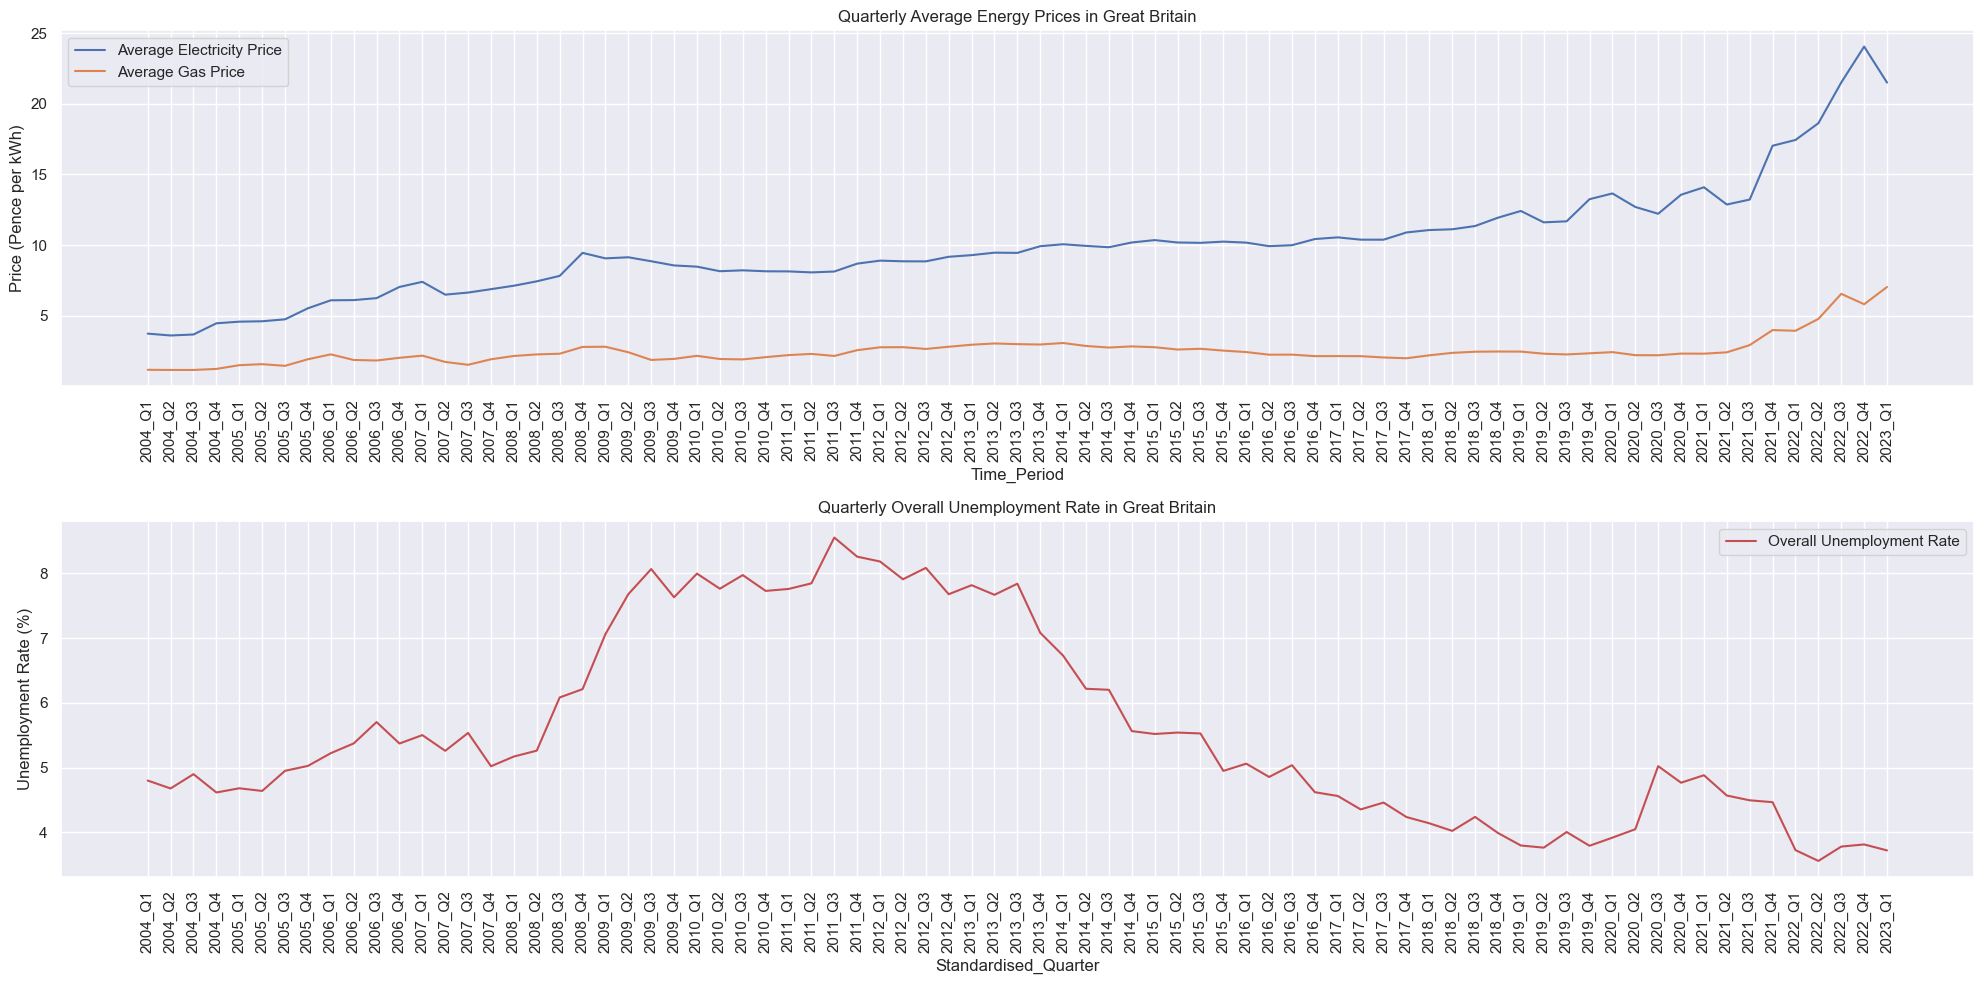

In [67]:
sns.set_theme()

plt.figure(figsize=(20, 10))

# plot energy prices
ax1 = plt.subplot(211)
sns.lineplot(data=energy_prices_df, x='Time_Period', y='Electricity: Average (Pence per kWh)', label='Average Electricity Price')
sns.lineplot(data=energy_prices_df, x='Time_Period', y='Gas: Average (Pence per kWh)', label='Average Gas Price')
ax1.set(ylabel='Price (Pence per kWh)', title='Quarterly Average Energy Prices in Great Britain')
plt.xticks(rotation=90)
plt.legend()

# plot overall unemployment rate
ax2 = plt.subplot(212, sharex=ax1)
sns.lineplot(data=average_unemployment_rates_df, x='Standardised_Quarter', y='Overall unemployment rate', color='r', label='Overall Unemployment Rate')
ax2.set(ylabel='Unemployment Rate (%)', title='Quarterly Overall Unemployment Rate in Great Britain')
plt.xticks(rotation=90)
plt.legend()

# display the plot
plt.tight_layout()
plt.show()


Above are the line plots for both the average energy prices and the overall unemployment rate from 2004 to Q1 2023:

The top plot shows the average electricity and gas prices in pence per kWh. Both show a general upward trend.
The bottom plot displays the overall unemployment rate in Great Britain. This plot also shows some fluctuation, but it's hard to see a clear trend just looking at the plot.

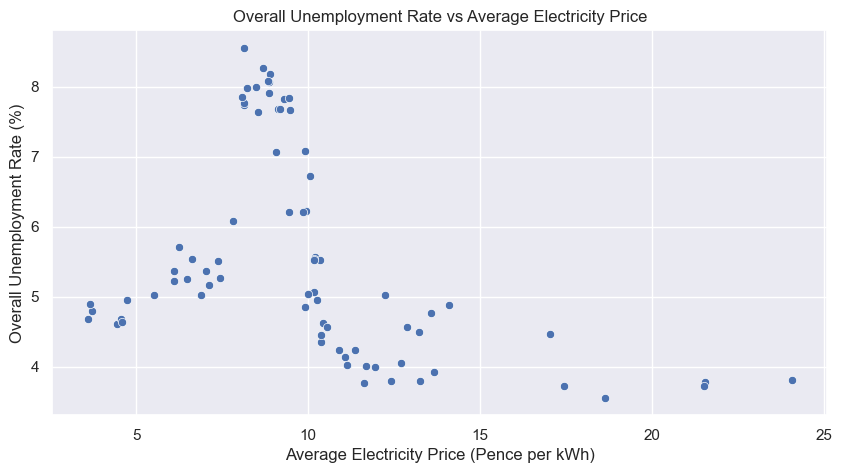

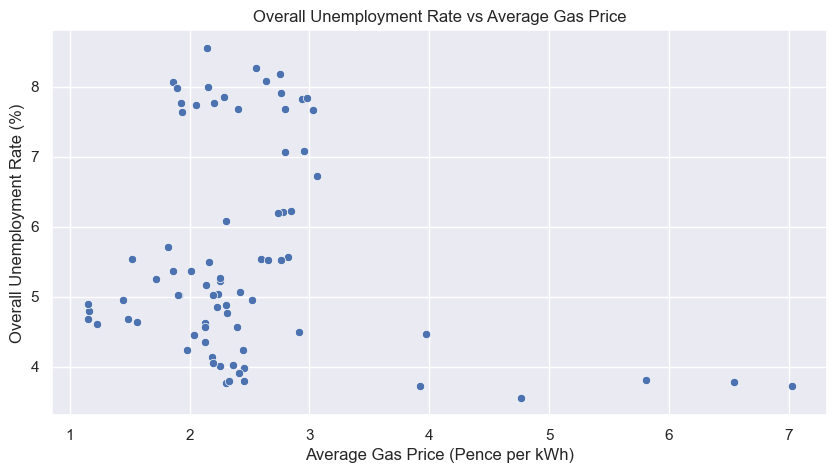

In [68]:
# Scatter plot for Overall Unemployment Rate vs Average Electricity Price
plt.figure(figsize=(10, 5))
sns.scatterplot(data=pd.merge(energy_prices_df, average_unemployment_rates_df, left_on='Time_Period', right_on='Standardised_Quarter'),
                x='Electricity: Average (Pence per kWh)', y='Overall unemployment rate')
plt.title('Overall Unemployment Rate vs Average Electricity Price')
plt.xlabel('Average Electricity Price (Pence per kWh)')
plt.ylabel('Overall Unemployment Rate (%)')
plt.show()

# Scatter plot for Overall Unemployment Rate vs Average Gas Price
plt.figure(figsize=(10, 5))
sns.scatterplot(data=pd.merge(energy_prices_df, average_unemployment_rates_df, left_on='Time_Period', right_on='Standardised_Quarter'),
                x='Gas: Average (Pence per kWh)', y='Overall unemployment rate')
plt.title('Overall Unemployment Rate vs Average Gas Price')
plt.xlabel('Average Gas Price (Pence per kWh)')
plt.ylabel('Overall Unemployment Rate (%)')
plt.show()


In [69]:
# merging the two dataframes on the quarterly time period columns
merged_df = pd.merge(energy_prices_df, average_unemployment_rates_df, left_on='Time_Period', right_on='Standardised_Quarter')
merged_df.to_csv("merged_df.csv", index=False)
merged_df.head()


,Time_Period,Electricity: Average (Pence per kWh),Gas: Average (Pence per kWh),Standardised_Quarter,Overall unemployment rate,"Agriculture, forestry, fishing, mining, energy & water (A, B, D, E)",Manufacturing (C),Construction (F),"Wholesale, retail & repair of motor vehicles (G)",Transport & storage (H),Accommodation & food services (I),Information & communication (J),"Financial, insurance & real estate activities (K, L)","Professional, scientific & technical activities (M)",Administrative & support services (N),Public admin & defence; social security (O),Education (P),Human health & social work activities (Q),"Other services (R, S, T)"
0,2004_Q1,3.724,1.162000,2004_Q1,4.799299,3.636696,4.623156,4.340292,4.091558,3.707012,7.842508,3.636642,2.820496,2.160254,5.997025,1.676916,1.789406,2.054532,3.999651
1,2004_Q2,3.593,1.151000,2004_Q2,4.676949,3.264491,4.718946,4.002409,3.844634,4.071253,7.353456,3.188830,2.641669,1.930722,4.909814,1.417540,1.533857,2.144295,3.317145
2,2004_Q3,3.663,1.150000,2004_Q3,4.898049,2.389047,3.653194,3.069838,3.772060,3.753921,7.178180,3.914641,2.742174,2.131072,5.789426,1.609065,1.787789,2.344563,2.889978
3,2004_Q4,4.456,1.223952,2004_Q4,4.614910,2.782514,3.740302,3.748652,3.955265,3.887650,7.013010,3.276624,3.212196,2.252480,5.823582,1.539214,1.605641,1.884125,3.018392
4,2005_Q1,4.572,1.488000,2005_Q1,4.679576,2.481022,4.321575,3.629335,4.413224,4.130643,6.745202,2.959017,3.391923,2.336578,6.388734,1.353386,1.697969,1.895929,3.503128


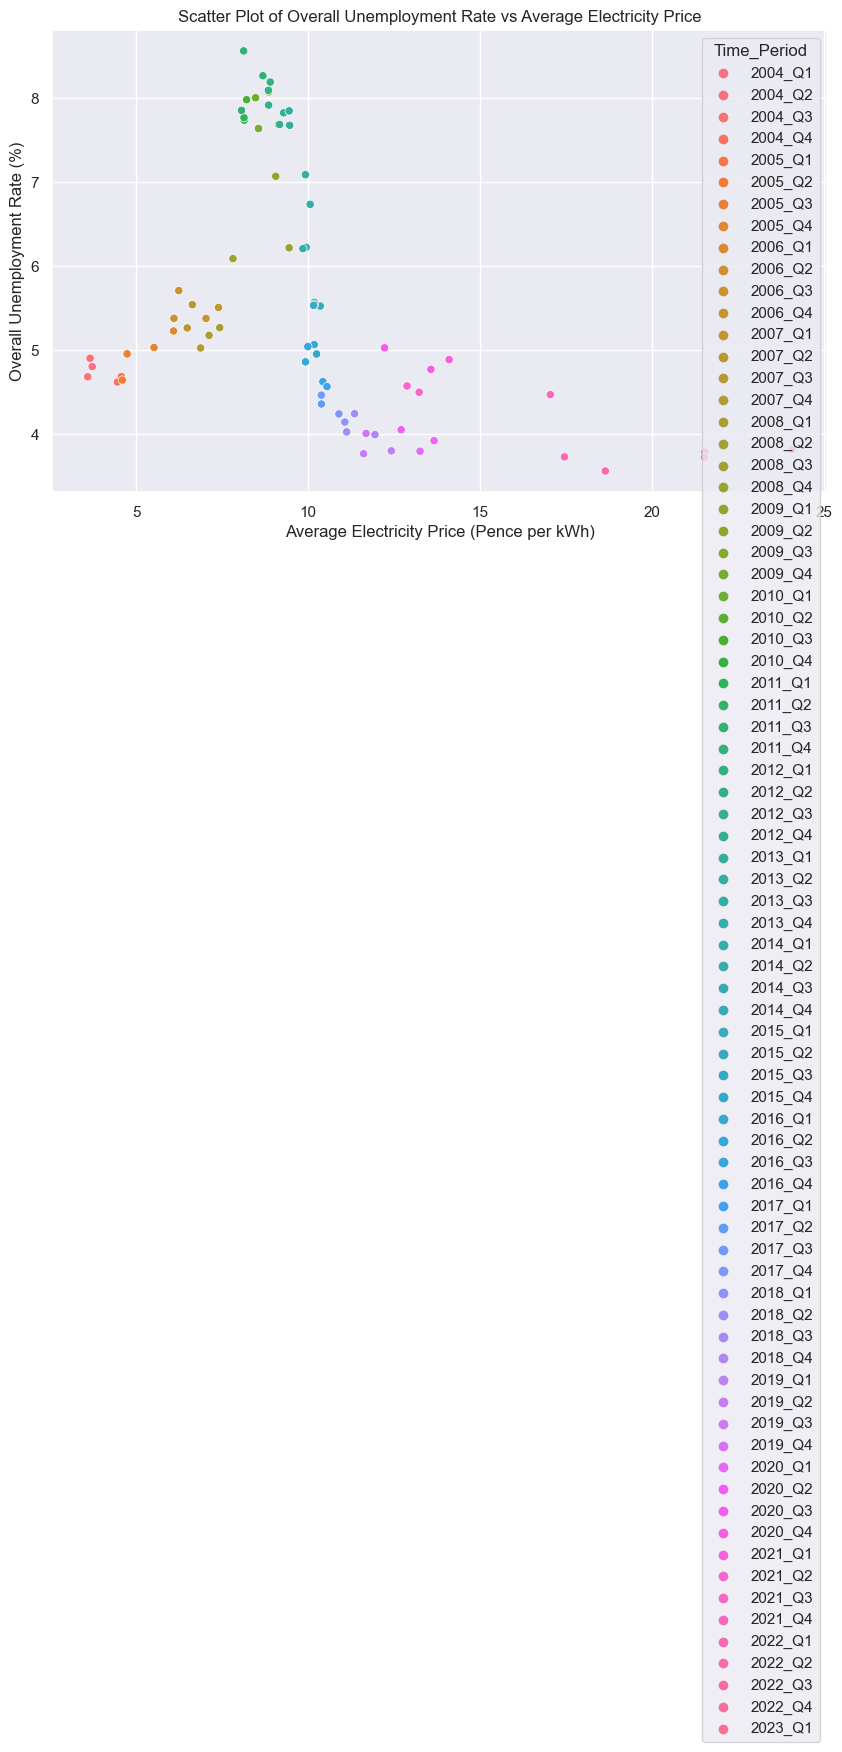

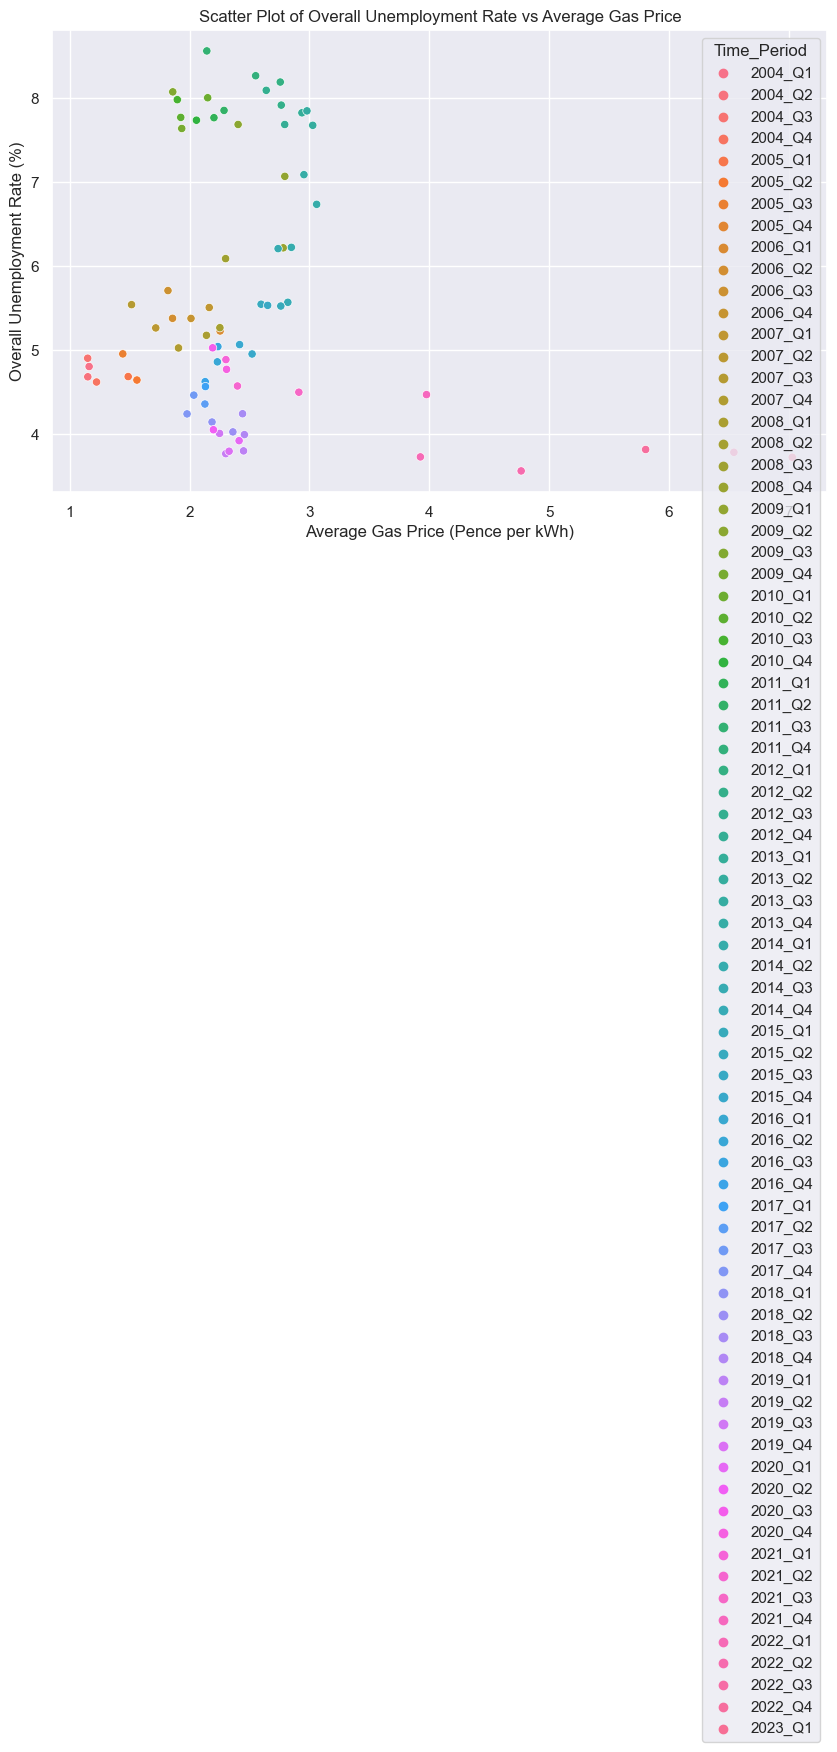

In [70]:
# scatter of overall unemployment rate vs average electricity price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Electricity: Average (Pence per kWh)', y='Overall unemployment rate', hue='Time_Period')
plt.title('Scatter Plot of Overall Unemployment Rate vs Average Electricity Price')
plt.xlabel('Average Electricity Price (Pence per kWh)')
plt.ylabel('Overall Unemployment Rate (%)')
plt.show()

# scatter plot of overall unemployment rate vs average gas price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='Gas: Average (Pence per kWh)', y='Overall unemployment rate', hue='Time_Period')
plt.title('Scatter Plot of Overall Unemployment Rate vs Average Gas Price')
plt.xlabel('Average Gas Price (Pence per kWh)')
plt.ylabel('Overall Unemployment Rate (%)')
plt.show()


The scatter plots above show the relationship between overall unemployment rates and average energy prices: the different colors in the scatter plots represent different time periods, letting us to see how the relationships have evolved over time.

In both plots, there doesn't seem to be a linear relationship between overall unemployment rates and average energy prices (both electricity and gas). However, there are a few observations worth noting:

Clustering: In both plots, you can see clusters of points, possibly indicating periods of similar economic conditions. These could be periods of economic growth or recession, where unemployment and energy prices move in a similar direction.

Time Periods: The different colors represent different time periods, and there's some color grouping, suggesting that both unemployment and energy prices have fluctuating but somewhat consistent patterns over specific periods.

Outliers: There are a few points that stand out from the rest, either with extremely high energy prices or unemployment rates. These could be due to specific economic events or anomalies in the data.

Variability: The overall unemployment rate seems to have less variability compared to energy prices, which appear more spread out.

In [90]:
sectors = [
    'Agriculture, forestry, fishing, mining, energy & water (A, B, D, E)',
    'Manufacturing (C)',
    'Construction (F)',
    'Wholesale, retail & repair of motor vehicles (G)',
    'Transport & storage (H)',
    'Accommodation & food services (I)',
    'Information & communication (J)',
    'Financial,  insurance & real estate activities (K, L)',
    'Professional, scientific & technical activities (M)',
    'Administrative & support services (N)',
    'Public admin & defence; social security (O)',
    'Education (P)',
    'Human health & social work activities (Q)',
    'Other services (R, S, T)'
]

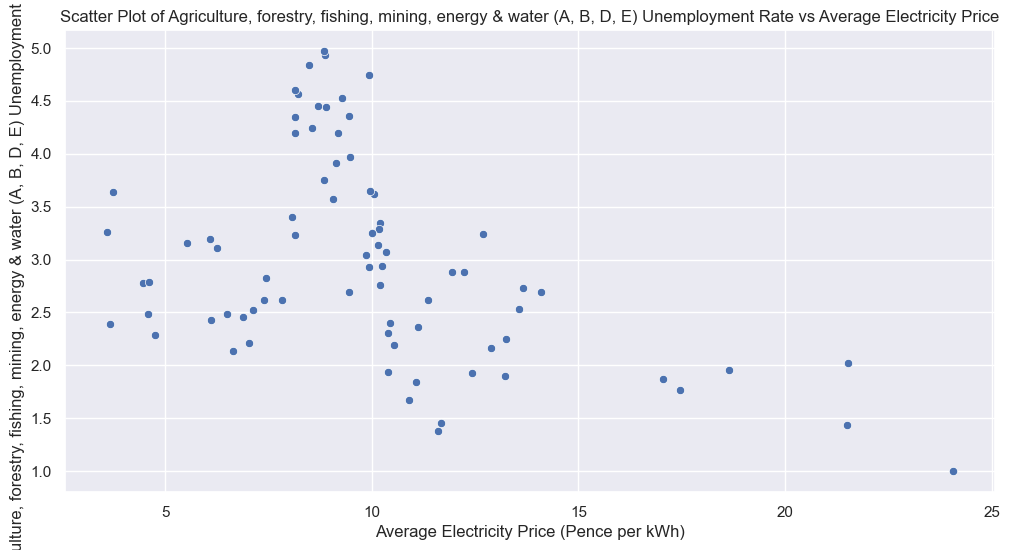

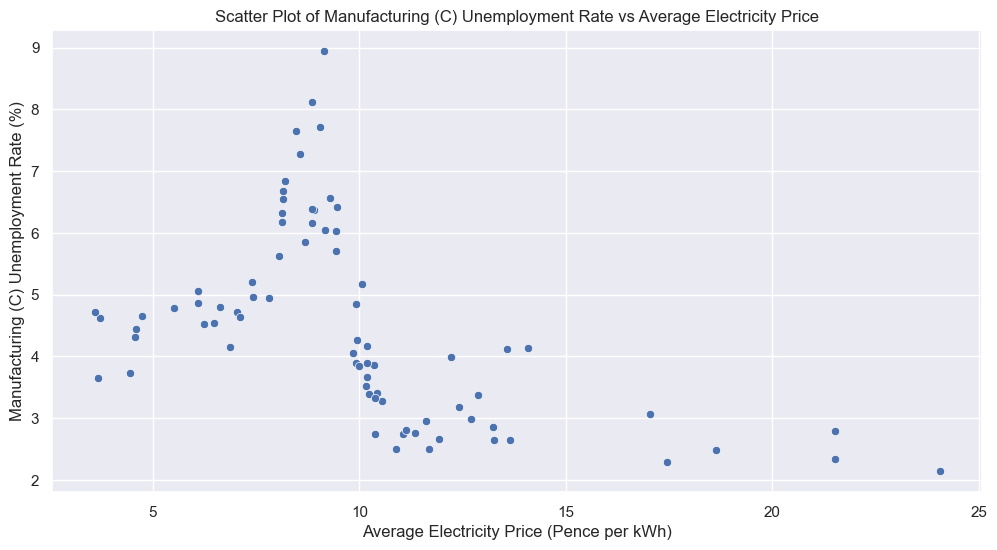

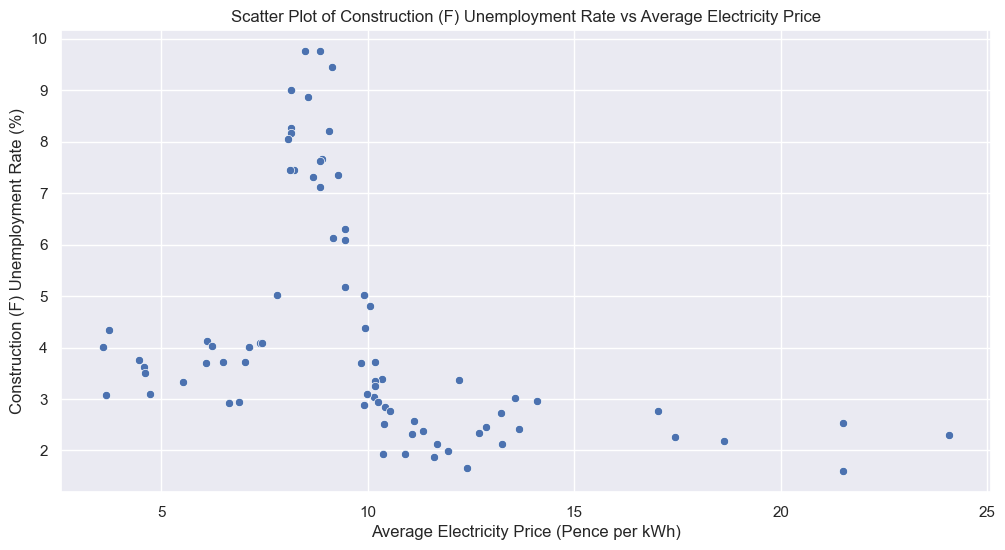

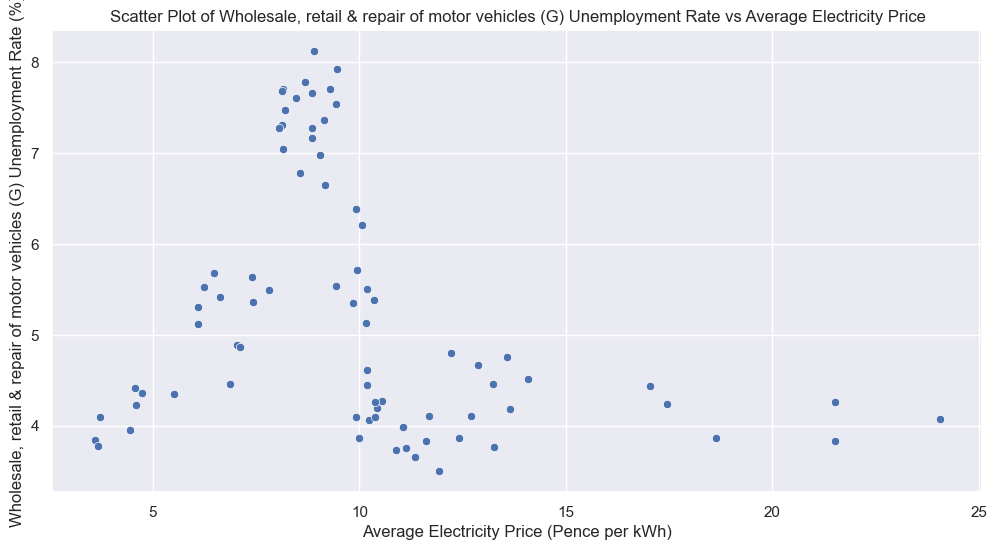

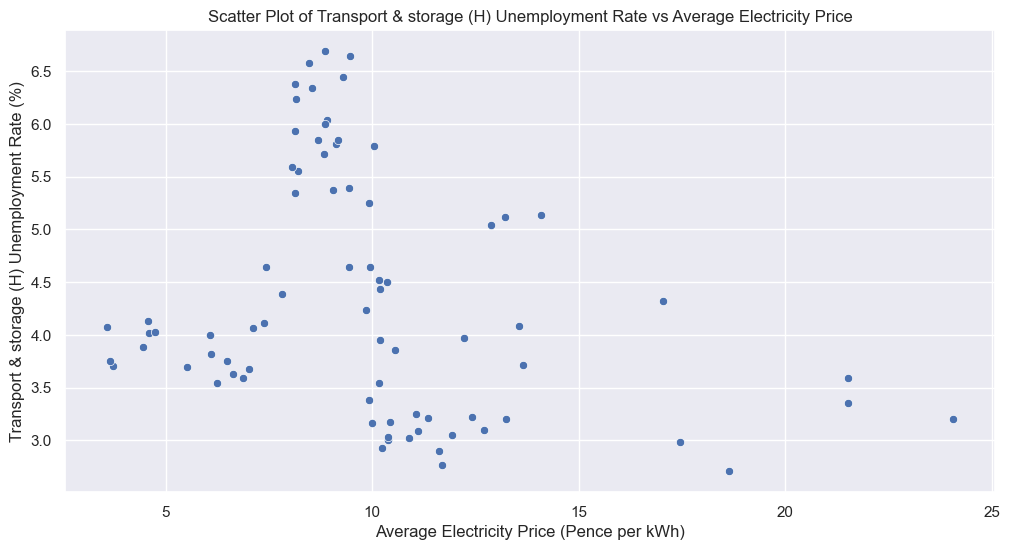

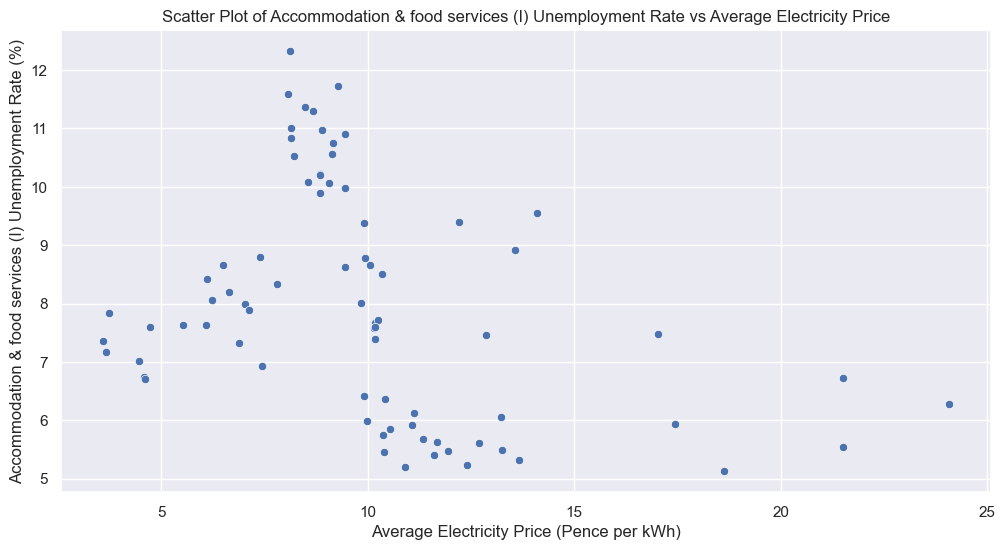

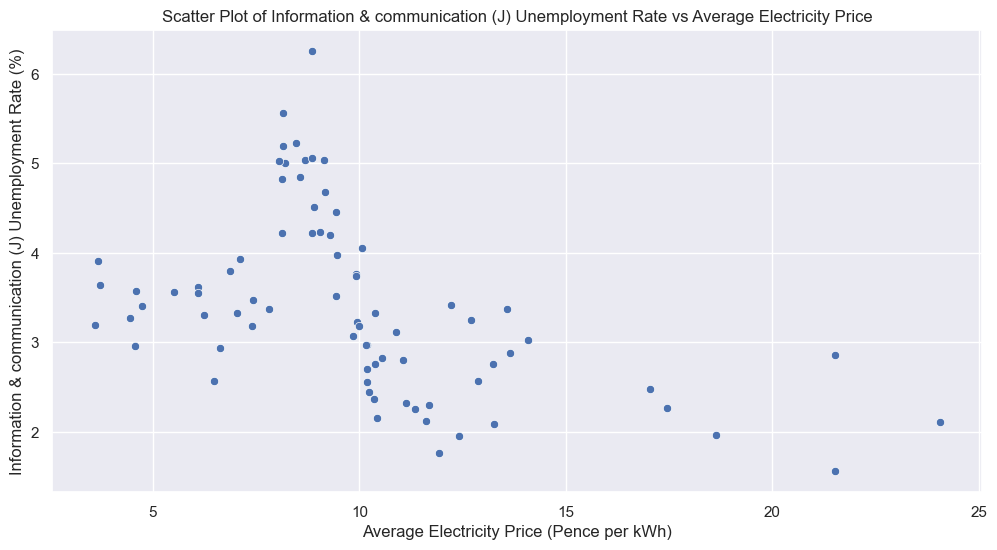

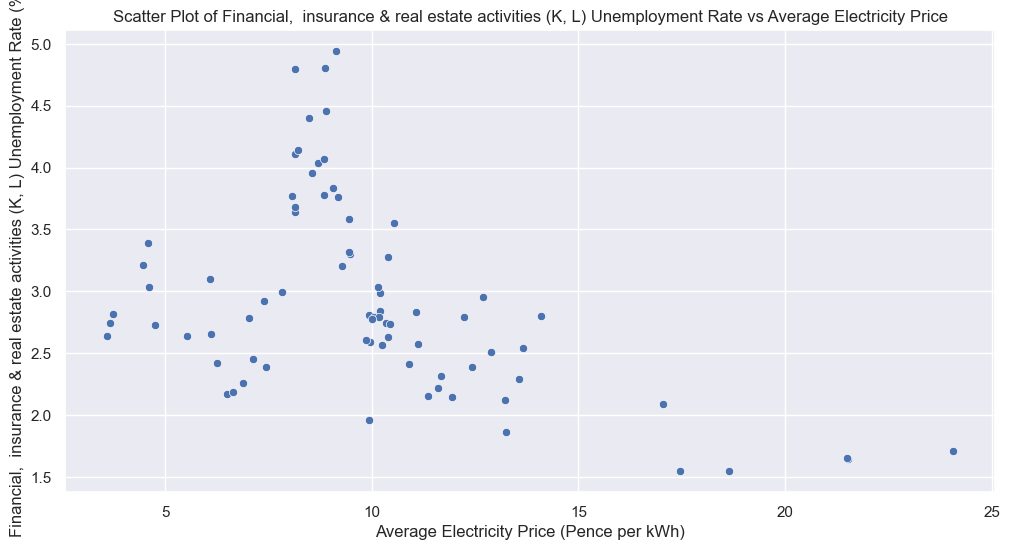

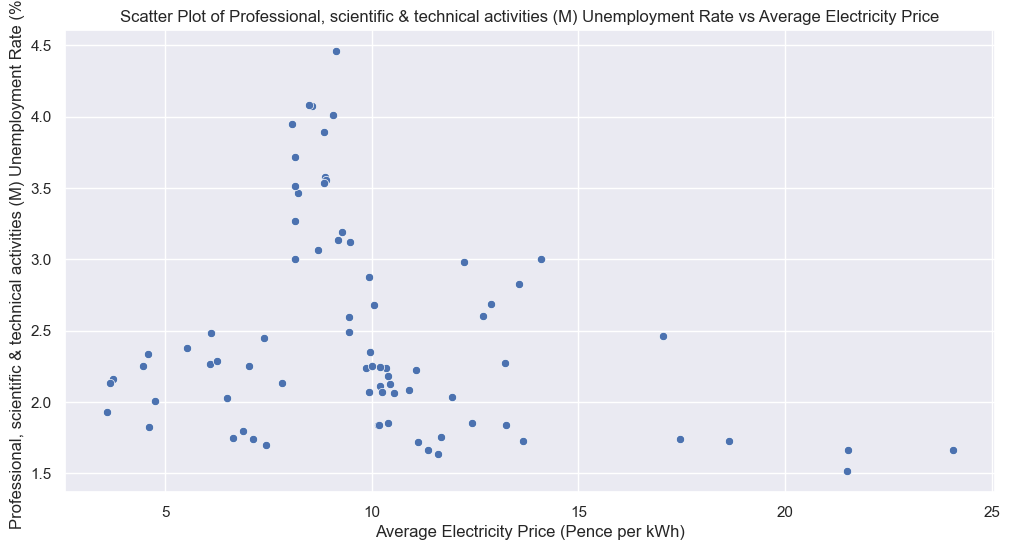

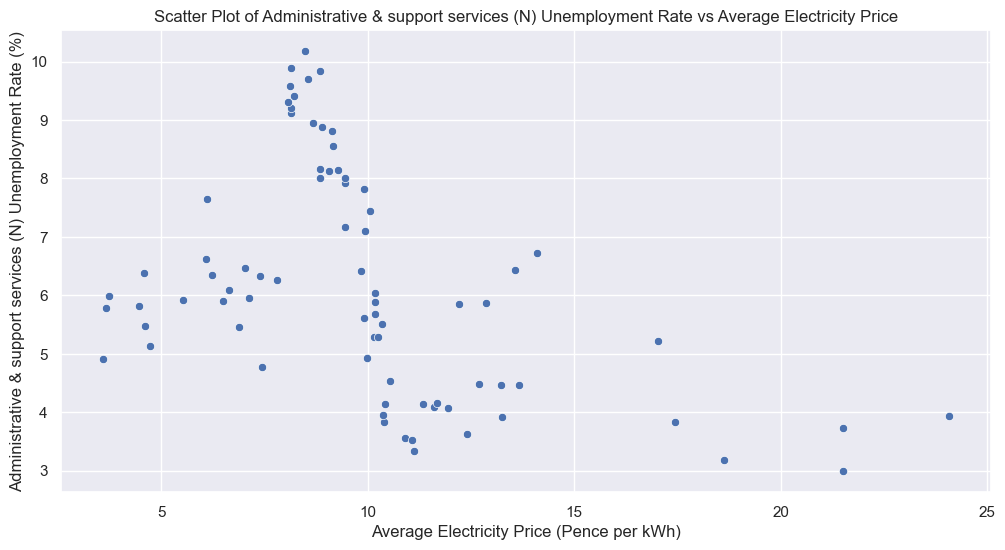

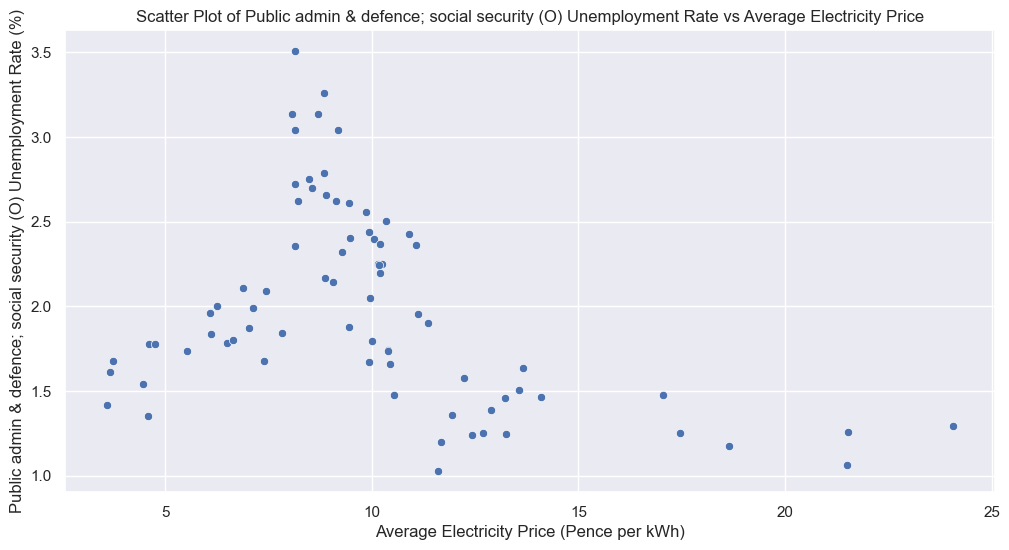

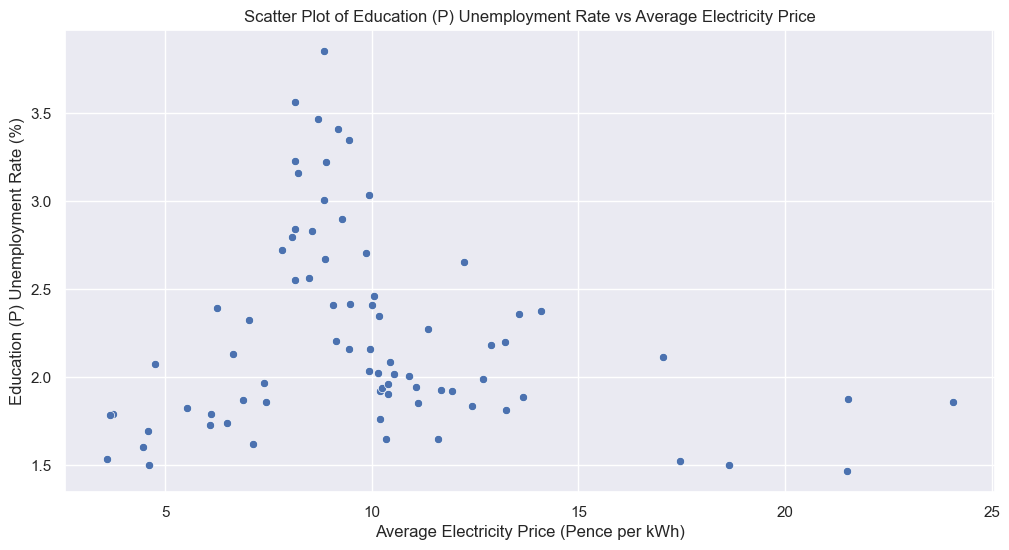

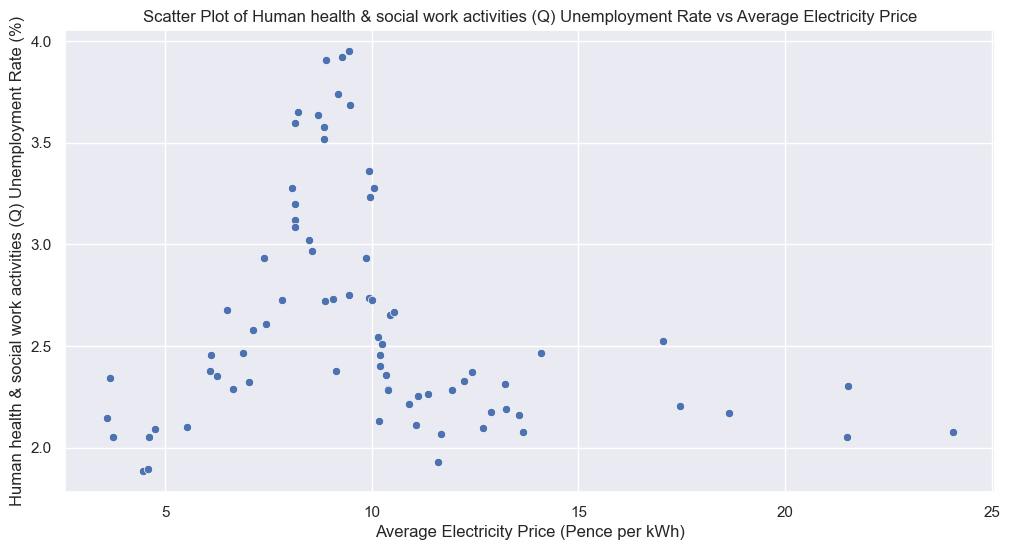

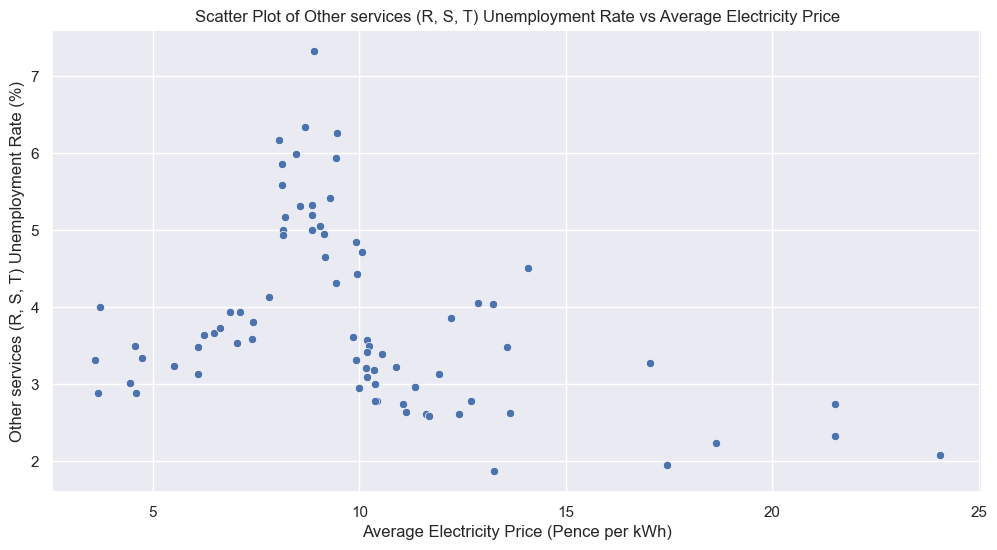

In [91]:
# generate scatter plots for each sector

for sector in sectors:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=merged_df, x='Electricity: Average (Pence per kWh)', y=sector)
    plt.title(f"Scatter Plot of {sector} Unemployment Rate vs Average Electricity Price")
    plt.xlabel("Average Electricity Price (Pence per kWh)")
    plt.ylabel(f"{sector} Unemployment Rate (%)")
    plt.show()


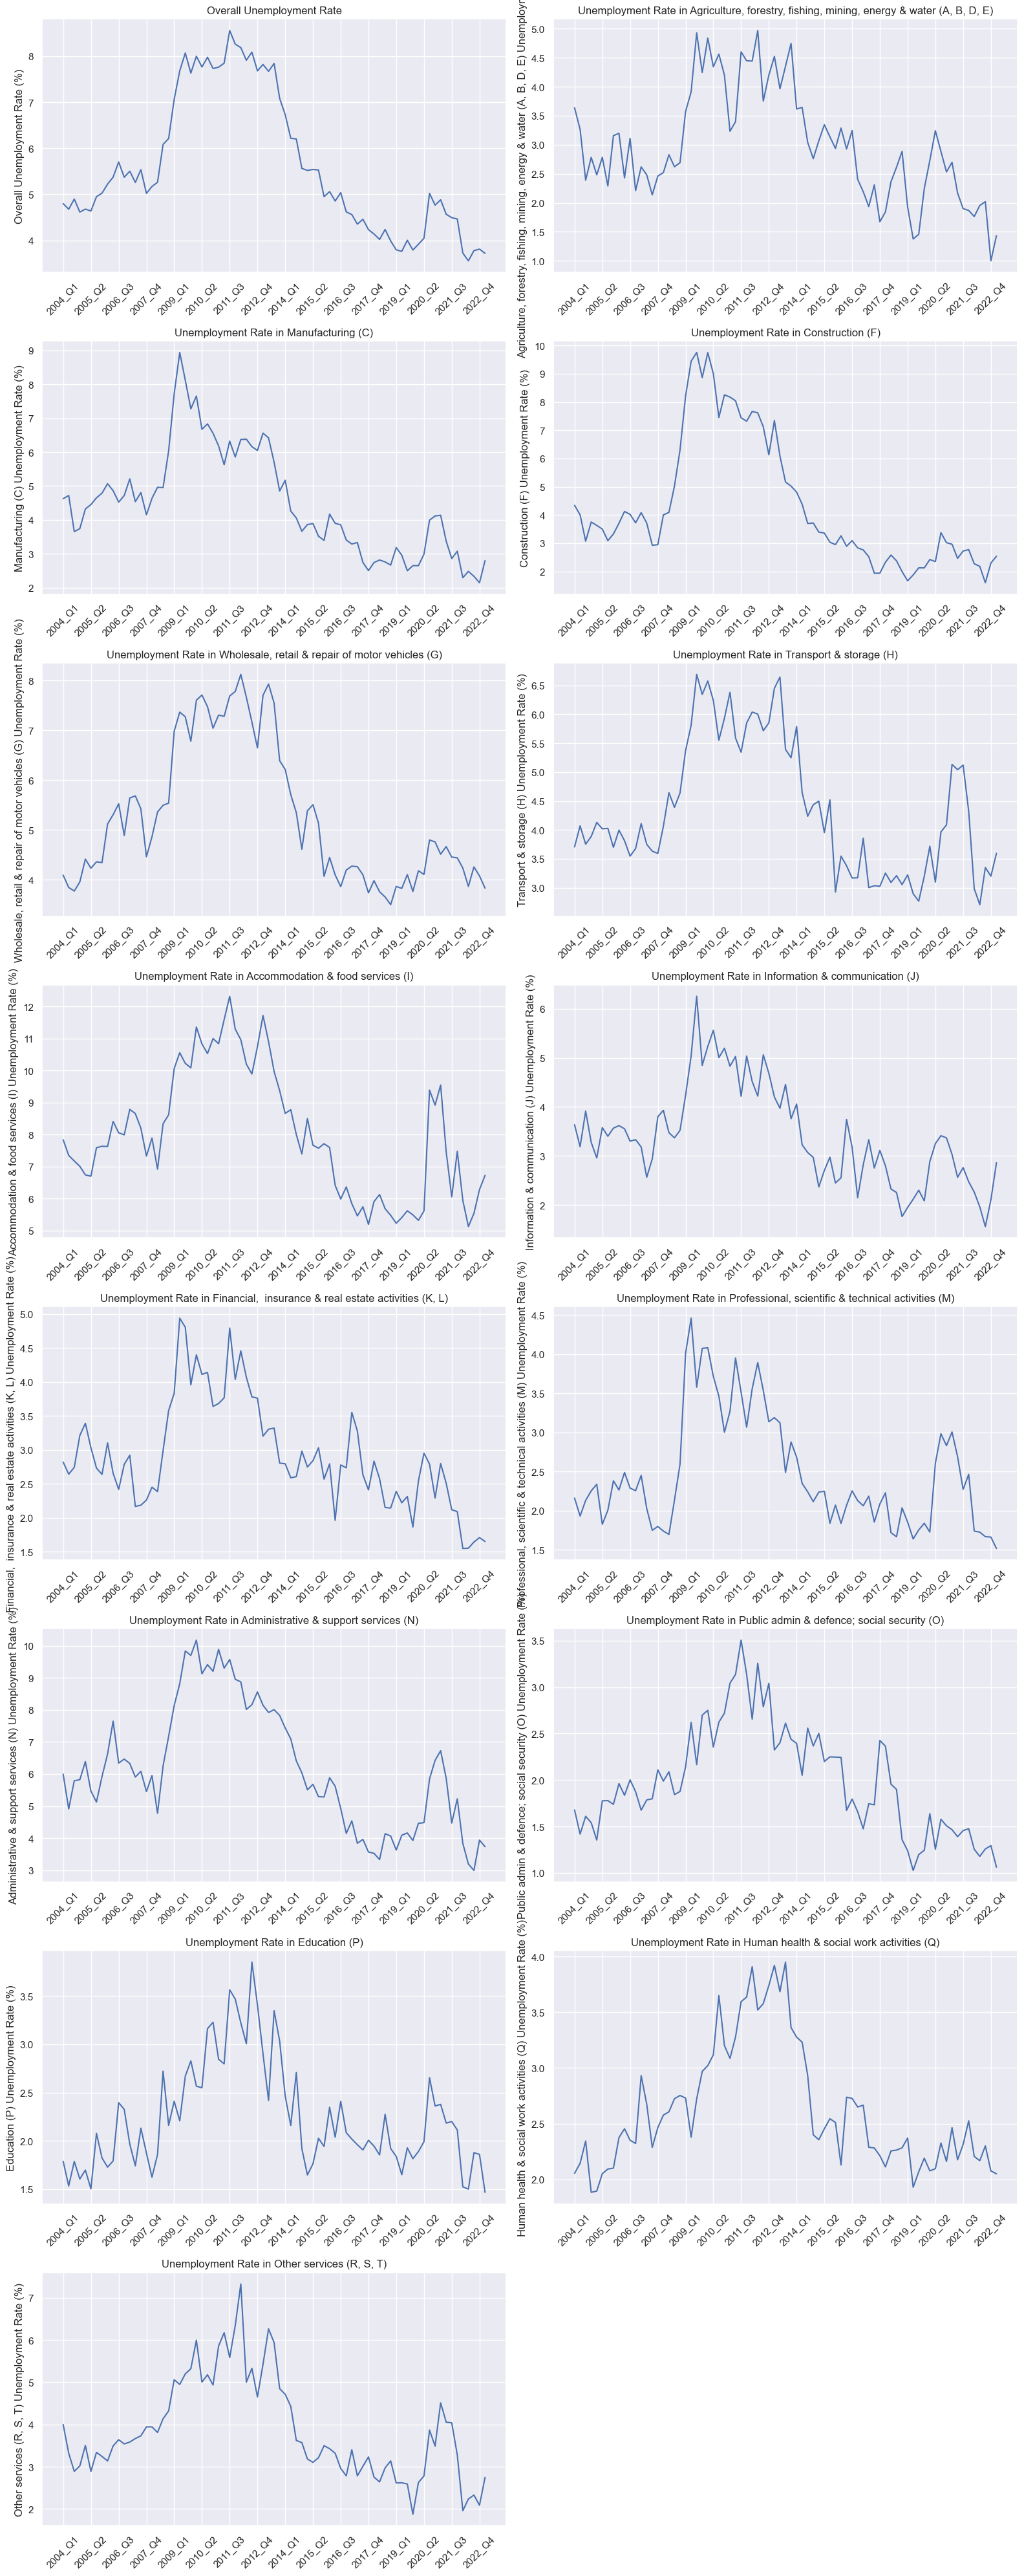

In [87]:
# Plotting unemployment rates in different sectors over time, along with average energy prices
plt.figure(figsize=(16, 40))

# plotting overall unemployment rate
plt.subplot(8, 2, 1)
sns.lineplot(data=merged_df, x='Time_Period', y='Overall unemployment rate')
plt.xticks(plt.xticks()[0][::5])
plt.xticks(rotation=45)
plt.title('Overall Unemployment Rate')
plt.xlabel('')
plt.ylabel('Overall Unemployment Rate (%)')

sectors = [
    'Agriculture, forestry, fishing, mining, energy & water (A, B, D, E)',
    'Manufacturing (C)',
    'Construction (F)',
    'Wholesale, retail & repair of motor vehicles (G)',
    'Transport & storage (H)',
    'Accommodation & food services (I)',
    'Information & communication (J)',
    'Financial,  insurance & real estate activities (K, L)',
    'Professional, scientific & technical activities (M)',
    'Administrative & support services (N)',
    'Public admin & defence; social security (O)',
    'Education (P)',
    'Human health & social work activities (Q)',
    'Other services (R, S, T)'
]

# Plotting sector unemployment rates
for i, sector in enumerate(sectors, 2):
    plt.subplot(8, 2, i)
    sns.lineplot(data=merged_df, x='Time_Period', y=sector)
    plt.title(f'Unemployment Rate in {sector}')
    plt.xlabel('')
    plt.ylabel(f'{sector} Unemployment Rate (%)')
    plt.xticks(plt.xticks()[0][::5])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


General Trends:
Electricity and Gas Prices: Both electricity and gas prices have generally seen an upward trend from 2004 to 2023. There are some fluctuations, but the overall direction is upward.

Overall Unemployment Rate: The unemployment rate has seen some fluctuations but generally appears to be decreasing or stable over the same time period.

Sector Unemployment Rates:
Manufacturing, Construction, and Retail: These sectors have shown a general decline in unemployment rates over the years, although they do experience fluctuations probably due to economic cycles?

Financial, Insurance & Real Estate Activities: This sector showed more stability in unemployment rates compared to other sectors, with less pronounced fluctuations.

Transport & Storage: Unemployment rates in this sector have been quite volatile, with noticeable peaks and troughs.

Information & Communication: This sector has seen a general decline in unemployment rates, which could be indicative of growing opportunities in the tech industry.

Administrative & Support Services: This sector experienced high unemployment rates around 2008-2009, possibly due to the financial crisis, but has since seen a decline.

Education: Unemployment rates in this sector have been fairly stable over time, with slight fluctuations.

Human Health & Social Work Activities: This sector has seen a gradual decline in unemployment rates over the period, possibly due to the increasing demand for healthcare services.

Correlation with Energy Prices:
While it's difficult to establish a direct causal relationship just from these visualizations, there doesn't appear to be a strong correlation between rising energy prices and increased unemployment rates across sectors. In fact, unemployment has been decreasing or stable in many sectors despite the upward trend in energy prices.


Note: point for future investigation - the data has not been seasonally adjusted, and further work could include decomposing the time series to identify and remove seasonal components for more accurate predictive modelling.
- LAG in effects of energy prices
- covid pandemic/war


**Machine Learning Models**
- Model Selection: we will suitable models for time series forecasting:
    Random Forest 
    ARIMA - 
    LSTM - ?  
    Prophet - ? 
- Training and Testing: Split the data into training and test sets, fit the model, and evaluate its performance.


In [74]:
# Random Forest regression model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# feature engineering: create lag features for energy prices
merged_df['Electricity_Avg_Lag1'] = merged_df['Electricity: Average (Pence per kWh)'].shift(1)
merged_df['Gas_Avg_Lag1'] = merged_df['Gas: Average (Pence per kWh)'].shift(1)

# drop first row as it will have NaN values for the lagged features
merged_df = merged_df.dropna()

# define features and target variable
features = ['Electricity_Avg_Lag1', 'Gas_Avg_Lag1']
target = 'Overall unemployment rate'

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(merged_df[features], merged_df[target], test_size=0.2, random_state=42)

# initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# predict on the test set
y_pred = rf_model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, mae, r2


(0.45905572944300366, 0.4419148359296267, 0.7131217347631391)

The Random Forest model produced the following evaluation metrics on the test set:
- Mean Squared Error (MSE): 0.46
- Mean Absolute Error (MAE): 0.44
- Rsq score: 0.71

The Rsq score of 0.71 indicates that the model explains approximately 71% of the variance in the unemployment rate, which is a decent level of explanatory power. The MAE and MSE are relatively low, suggesting that the model's predictions are close to the actual unemployment rates.

In [75]:
# ARIMA
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Extract the 'Overall unemployment rate' data
unemployment_data = merged_df['Overall unemployment rate'].dropna()

# Initialize variables to store the best results
best_aic = np.inf
best_order = None
best_model = None

# Grid search
for p in range(3):
    for d in range(2):
        for q in range(3):
            order = (p, d, q)
            try:
                # fit the ARIMA model
                model = ARIMA(unemployment_data, order=order)
                model_fit = model.fit()
                
                # get the AIC value
                aic = model_fit.aic
                
                # check if this AIC is better than the best one so far
                if aic < best_aic:
                    best_aic = aic
                    best_order = order
                    best_model = model_fit
                    
            except:
                continue

best_order, best_aic


d:\Users\ellie.brakoniecki\Desktop\ONS\Module_10_project\Energy-prices-project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Users\ellie.brakoniecki\Desktop\ONS\Module_10_project\Energy-prices-project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Users\ellie.brakoniecki\Desktop\ONS\Module_10_project\Energy-prices-project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Users\ellie.brakoniecki\Desktop\ONS\Module_10_project\Energy-prices-project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored

((2, 1, 1), 27.924570340025127)

In [76]:
# For the ARIMA model needs time period as datetime objects: 

def to_datetime_first_day(quarter_str):
    year, qtr = quarter_str.split('_Q')
    first_month = (int(qtr) - 1) * 3 + 1  # First month of the quarter
    return pd.Timestamp(f'{year}-{first_month:02d}-01')

def convert_time_period_to_dt(merged_df):
    merged_df['Time_Period_dt'] = merged_df['Time_Period'].apply(to_datetime_first_day)
    merged_df = merged_df.set_index('Time_Period_dt')
    merged_df.drop(columns=["Standardised_Quarter", "Time_Period"], inplace=True)
    return merged_df
    

merged_df = pd.read_csv('merged_df.csv')
merged_df_dt = convert_time_period_to_dt(merged_df)
merged_df_dt

,Electricity: Average (Pence per kWh),Gas: Average (Pence per kWh),Overall unemployment rate,"Agriculture, forestry, fishing, mining, energy & water (A, B, D, E)",Manufacturing (C),Construction (F),"Wholesale, retail & repair of motor vehicles (G)",Transport & storage (H),Accommodation & food services (I),Information & communication (J),"Financial, insurance & real estate activities (K, L)","Professional, scientific & technical activities (M)",Administrative & support services (N),Public admin & defence; social security (O),Education (P),Human health & social work activities (Q),"Other services (R, S, T)"
Time_Period_dt,,,,,,,,,,,,,,,,,
2004-01-01,3.724000,1.162000,4.799299,3.636696,4.623156,4.340292,4.091558,3.707012,7.842508,3.636642,2.820496,2.160254,5.997025,1.676916,1.789406,2.054532,3.999651
2004-04-01,3.593000,1.151000,4.676949,3.264491,4.718946,4.002409,3.844634,4.071253,7.353456,3.188830,2.641669,1.930722,4.909814,1.417540,1.533857,2.144295,3.317145
2004-07-01,3.663000,1.150000,4.898049,2.389047,3.653194,3.069838,3.772060,3.753921,7.178180,3.914641,2.742174,2.131072,5.789426,1.609065,1.787789,2.344563,2.889978
2004-10-01,4.456000,1.223952,4.614910,2.782514,3.740302,3.748652,3.955265,3.887650,7.013010,3.276624,3.212196,2.252480,5.823582,1.539214,1.605641,1.884125,3.018392
2005-01-01,4.572000,1.488000,4.679576,2.481022,4.321575,3.629335,4.413224,4.130643,6.745202,2.959017,3.391923,2.336578,6.388734,1.353386,1.697969,1.895929,3.503128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-01,17.446176,3.926175,3.723584,1.763448,2.291003,2.270481,4.233117,2.983935,5.943698,2.264370,1.546545,1.738460,3.833080,1.253647,1.524491,2.206168,1.957837
2022-04-01,18.631958,4.767035,3.556759,1.954195,2.478812,2.179001,3.864889,2.708141,5.129839,1.963085,1.551684,1.725542,3.191480,1.177688,1.500741,2.168027,2.235817
2022-07-01,21.518042,6.542257,3.778478,2.019236,2.333634,1.598377,4.257406,3.350688,5.541883,1.560790,1.642225,1.667754,2.992199,1.256947,1.877919,2.300981,2.329278


In [85]:
# Calculate the correlation matrix between energy prices and unemployment rates for each sector
correlation_matrix = merged_df_dt.corr()

# Extract the correlation values between energy prices and unemployment rates
electricity_unemployment_corr = correlation_matrix.loc['Electricity: Average (Pence per kWh)'][3:]
gas_unemployment_corr = correlation_matrix.loc['Gas: Average (Pence per kWh)'][3:]

# Create a DataFrame to display the correlation values
correlation_df = pd.DataFrame({
    'Electricity_Unemployment_Correlation': electricity_unemployment_corr,
    'Gas_Unemployment_Correlation': gas_unemployment_corr
})

correlation_df.reset_index(inplace=True)
correlation_df.rename(columns={'index': 'Sector'}, inplace=True)

correlation_df


,Sector,Electricity_Unemployment_Correlation,Gas_Unemployment_Correlation
0,"Agriculture, forestry, fishing, mining, energy...",-0.420048,-0.240956
1,Manufacturing (C),-0.497402,-0.273531
2,Construction (F),-0.358580,-0.163857
3,"Wholesale, retail & repair of motor vehicles (G)",-0.271435,-0.053003
4,Transport & storage (H),-0.255433,-0.069948
5,Accommodation & food services (I),-0.347034,-0.137404
6,Information & communication (J),-0.470218,-0.296363
7,"Financial, insurance & real estate activities...",-0.461651,-0.352856
8,"Professional, scientific & technical activitie...",-0.232753,-0.160801
9,Administrative & support services (N),-0.438203,-0.250851


In [78]:
# ARIMA
from statsmodels.tsa.arima.model import ARIMA
merged_df = pd.read_csv('merged_df.csv')
merged_df_dt = convert_time_period_to_dt(merged_df)

# fit the ARIMA model
arima_model = ARIMA(merged_df_dt['Overall unemployment rate'], order=(1,1,1))
arima_fit = arima_model.fit()

# summary of model
arima_fit.summary()


d:\Users\ellie.brakoniecki\Desktop\ONS\Module_10_project\Energy-prices-project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
d:\Users\ellie.brakoniecki\Desktop\ONS\Module_10_project\Energy-prices-project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
d:\Users\ellie.brakoniecki\Desktop\ONS\Module_10_project\Energy-prices-project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     Overall unemployment rate   No. Observations:                   77
Model:                        ARIMA(1, 1, 1)   Log Likelihood                 -14.754
Date:                       Thu, 07 Sep 2023   AIC                             35.509
Time:                               14:21:54   BIC                             42.501
Sample:                           01-01-2004   HQIC                            38.303
                                - 01-01-2023                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9986      0.007   -146.200      0.000      -1.012      -0.985
ma.L1          0.9696      0.073     13.266      0.000       0.826       1.113
sigma2         0.0843      0.011      7.829      0.000       0.063       0.105
===================================================================================
Ljung-Box (L1) (Q):                   8.94   Jarque-Bera (JB):                10.51
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               0.90   Skew:                             0.38
Prob(H) (two-sided):                  0.79   Kurtosis:                         4.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARIMA(1,1,1) model was used, meaning it has one AR (AutoRegressive) term, one differencing order, and one MA (Moving Average) term.
The log-likelihood value is -14.754, which gives us an AIC (Akaike Information Criterion) value of 35.509. A lower AIC value generally indicates a better model fit.
The P-values for the AR and MA terms are significant (less than 0.05), which suggests these terms are statistically significant.



In [79]:
# Try diff params 
merged_df = pd.read_csv('merged_df.csv')
merged_df_dt = convert_time_period_to_dt(merged_df)
model = ARIMA(merged_df_dt['Overall unemployment rate'], order=(5,1,0))
model_fit = model.fit()
model_fit.summary()

d:\Users\ellie.brakoniecki\Desktop\ONS\Module_10_project\Energy-prices-project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
d:\Users\ellie.brakoniecki\Desktop\ONS\Module_10_project\Energy-prices-project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
d:\Users\ellie.brakoniecki\Desktop\ONS\Module_10_project\Energy-prices-project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     Overall unemployment rate   No. Observations:                   77
Model:                        ARIMA(5, 1, 0)   Log Likelihood                  -8.502
Date:                       Thu, 07 Sep 2023   AIC                             29.004
Time:                               14:22:28   BIC                             42.988
Sample:                           01-01-2004   HQIC                            34.593
                                - 01-01-2023                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2335      0.105      2.231      0.026       0.028       0.439
ar.L2          0.1665      0.118      1.409      0.159      -0.065       0.398
ar.L3         -0.1178      0.115     -1.028      0.304      -0.342       0.107
ar.L4          0.4083      0.110      3.702      0.000       0.192       0.624
ar.L5         -0.3023      0.111     -2.734      0.006      -0.519      -0.086
sigma2         0.0719      0.010      7.248      0.000       0.052       0.091
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 3.45
Prob(Q):                              0.79   Prob(JB):                         0.18
Heteroskedasticity (H):               1.45   Skew:                             0.05
Prob(H) (two-sided):                  0.36   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

ARIMA(5, 1, 0) model has been used.
The AIC (Akaike Information Criterion) value is 29.004.  helps to compare the goodness-of-fit of different models; the lower the AIC, the better the model.
The Ljung-Box (Q) statistic for autocorrelation in residuals is 0.07, and the p-value is 0.79, suggesting that residuals are not correlated.
The Jarque-Bera test suggests that the residuals are normally distributed (p-value = 0.18).
The coefficients for the AR terms are provided, along with their p-values. A low p-value (< 0.05) suggests that the respective term is significant.

ARIMA: 
AutoRegressive (AR) refers to relationship between an observation and several lagged observations (previous time steps).
Integrated (I) refers to the differencing of the observations to make the time series stationary.
Moving Average (MA) terms correct for error in the observations.


In [80]:


merged_df = pd.read_csv('merged_df.csv')
merged_df_dt = convert_time_period_to_dt(merged_df)

# Fit the ARIMA model
# Using p=2, d=1, and q=0 as parameters
model = ARIMA(merged_df_dt['Overall unemployment rate'], order=(2, 1, 0))
model_fit = model.fit()

# Summary of the ARIMA model
model_fit.summary()


d:\Users\ellie.brakoniecki\Desktop\ONS\Module_10_project\Energy-prices-project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
d:\Users\ellie.brakoniecki\Desktop\ONS\Module_10_project\Energy-prices-project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
d:\Users\ellie.brakoniecki\Desktop\ONS\Module_10_project\Energy-prices-project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     Overall unemployment rate   No. Observations:                   77
Model:                        ARIMA(2, 1, 0)   Log Likelihood                 -18.931
Date:                       Thu, 07 Sep 2023   AIC                             43.862
Time:                               14:23:18   BIC                             50.854
Sample:                           01-01-2004   HQIC                            46.657
                                - 01-01-2023                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0162      0.115     -0.141      0.888      -0.241       0.209
ar.L2          0.3699      0.104      3.543      0.000       0.165       0.575
sigma2         0.0960      0.013      7.205      0.000       0.070       0.122
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 3.53
Prob(Q):                              0.57   Prob(JB):                         0.17
Heteroskedasticity (H):               0.94   Skew:                             0.31
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
merged_df = pd.read_csv('merged_df.csv')
merged_df_dt = convert_time_period_to_dt(merged_df)

# Define the dataset for ARIMA model
data = merged_df_dt['Overall unemployment rate'].values

# Split data into training and test set (80% training, 20% testing)
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Fit ARIMA model to the training data
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test))

# Calculate and print the mean squared error
mse = mean_squared_error(test, predictions)
mse


0.5307292729937666

The mean squared error (MSE) for the ARIMA model on the test set is approximately 
0.531
0.531. This value gives us an idea of how well the model's forecasts match the actual values. The smaller the MSE, the better the model has performed.

d:\Users\ellie.brakoniecki\Desktop\ONS\Module_10_project\Energy-prices-project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
d:\Users\ellie.brakoniecki\Desktop\ONS\Module_10_project\Energy-prices-project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
d:\Users\ellie.brakoniecki\Desktop\ONS\Module_10_project\Energy-prices-project\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
d:\Users\ellie.brakoniecki\Desktop\ONS\Module_10_project\Energy-prices-project\venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed t

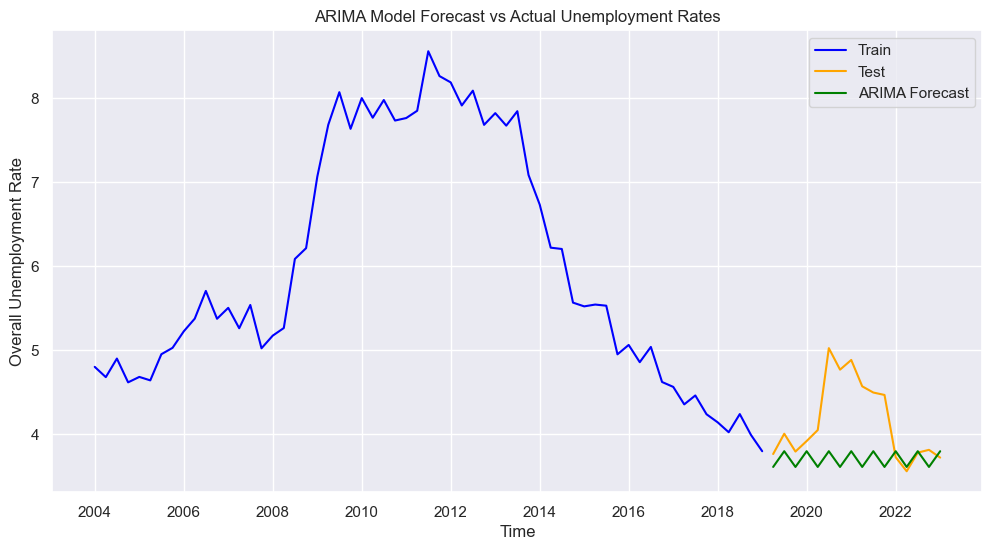

(0.4082060690433973,
 2019-04-01    3.608089
 2019-07-01    3.795209
 2019-10-01    3.608091
 2020-01-01    3.795206
 2020-04-01    3.608093
 2020-07-01    3.795204
 2020-10-01    3.608095
 2021-01-01    3.795202
 2021-04-01    3.608097
 2021-07-01    3.795200
 Freq: QS-OCT, Name: predicted_mean, dtype: float64)

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the data
merged_df = pd.read_csv('merged_df.csv')
merged_df_dt = convert_time_period_to_dt(merged_df)



unemployment_data = merged_df_dt['Overall unemployment rate']

train_size = int(len(unemployment_data) * 0.8)
train, test = unemployment_data[0:train_size], unemployment_data[train_size:]

arima_model = ARIMA(train, order=(1, 1, 1))
fitted_model = arima_model.fit()

forecast = fitted_model.forecast(steps=len(test))

mse = mean_squared_error(test, forecast)

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, forecast, label='ARIMA Forecast', color='green')
plt.legend(loc='best')
plt.title('ARIMA Model Forecast vs Actual Unemployment Rates')
plt.xlabel('Time')
plt.ylabel('Overall Unemployment Rate')
plt.grid(True)
plt.show()

mse, forecast[:10]
